In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv(os.path.join("data/KidneyData.csv"))
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna(how='any')

In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,274.841772,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342
std,102.998517,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000
25%,243.000000,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000
50%,298.500000,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000
75%,355.750000,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000
max,399.000000,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000


In [5]:
df.drop(df[df.pot > 40].index, inplace=True)
df.drop(df[df.bgr > 400].index, inplace=True)
df.drop(df[df.bu > 300].index, inplace=True)

# Preprocessing of Data

In [6]:
data = df["cad"].copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,no,yes
3,1,0
9,1,0
11,1,0
14,0,1
20,0,1


In [7]:
target = data_binary_encoded["no"]
target_names = ["negative", "positive"]

In [8]:
kidney_data = df.drop(columns=["cad", "id"], axis=1)

In [9]:
data1 = kidney_data.copy()

data_binary_encoded1 = pd.get_dummies(data1, columns=["rbc", "pc", "pcc", "ba", "htn", "dm", "appet", "pe", "ane", "classification"])
data_binary_encoded1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_notckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0,1,0,1,1,0,0,1,1,0
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0,1,0,1,0,1,1,0,1,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,1,0,1,1,0,1,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,1,0,1,0,1,0,1,1,0


In [10]:
data_binary_encoded1.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_abnormal', 'rbc_normal', 'pc_abnormal',
       'pc_normal', 'pcc_notpresent', 'pcc_present', 'ba_notpresent',
       'ba_present', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'appet_good',
       'appet_poor', 'pe_no', 'pe_yes', 'ane_no', 'ane_yes',
       'classification_ckd', 'classification_notckd'],
      dtype='object')

In [11]:
kidney_binary_data = data_binary_encoded1.drop(columns=['rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes','appet_poor', 'pe_yes', 'ane_yes', 'classification_notckd'])
kidney_binary_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_abnormal', 'pc_abnormal', 'pcc_notpresent',
       'ba_notpresent', 'htn_no', 'dm_no', 'appet_good', 'pe_no', 'ane_no',
       'classification_ckd'],
      dtype='object')

In [12]:
feature_names = kidney_binary_data.columns

In [13]:
kidney_binary_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_abnormal,pc_abnormal,pcc_notpresent,ba_notpresent,htn_no,dm_no,appet_good,pe_no,ane_no,classification_ckd
count,154.000000,154.000000,154.000000,154.00000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,49.376623,73.766234,1.020097,0.74026,0.181818,126.220779,49.883117,2.094156,139.038961,4.355844,...,0.103896,0.168831,0.915584,0.928571,0.805195,0.844156,0.883117,0.876623,0.909091,0.253247
std,15.661483,11.089530,0.005377,1.37106,0.651339,53.210305,42.096364,2.970536,7.446439,0.751294,...,0.306121,0.375825,0.278917,0.258380,0.397343,0.363891,0.322329,0.329942,0.288418,0.436290
min,6.000000,50.000000,1.005000,0.00000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,60.000000,1.020000,0.00000,0.000000,96.250000,25.250000,0.700000,135.000000,3.700000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,50.000000,75.000000,1.020000,0.00000,0.000000,113.000000,39.000000,1.050000,140.000000,4.500000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,60.000000,80.000000,1.025000,0.00000,0.000000,131.000000,49.000000,1.200000,144.000000,4.900000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000
max,83.000000,110.000000,1.025000,4.00000,4.000000,380.000000,235.000000,15.200000,150.000000,7.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
kidney_binary_data.sort_values("pot", ascending=False)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_abnormal,pc_abnormal,pcc_notpresent,ba_notpresent,htn_no,dm_no,appet_good,pe_no,ane_no,classification_ckd
84,59.0,70.0,1.010,3.0,0.0,76.0,186.0,15.0,135.0,7.6,...,0,1,1,1,0,1,0,0,0,1
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,0,0,0,0,0,1,1
58,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,...,1,1,1,1,0,0,1,1,1,1
210,59.0,100.0,1.015,4.0,2.0,255.0,132.0,12.8,135.0,5.7,...,0,0,1,1,0,0,1,1,0,1
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,15.2,120.0,5.7,...,1,0,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,49.0,100.0,1.010,3.0,0.0,129.0,158.0,11.8,122.0,3.2,...,1,1,1,1,0,0,0,0,0,1
147,60.0,60.0,1.010,3.0,1.0,288.0,36.0,1.7,130.0,3.0,...,0,1,0,1,0,1,0,1,0,1
229,59.0,50.0,1.010,3.0,0.0,241.0,191.0,12.0,114.0,2.9,...,0,1,1,1,1,0,1,0,1,1
93,73.0,100.0,1.010,3.0,2.0,295.0,90.0,5.6,140.0,2.9,...,1,1,0,1,0,0,0,1,1,1


In [15]:
kidney_binary_data.drop(kidney_binary_data[kidney_binary_data.pot > 40].index, inplace=True)

In [16]:
kidney_binary_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_abnormal,pc_abnormal,pcc_notpresent,ba_notpresent,htn_no,dm_no,appet_good,pe_no,ane_no,classification_ckd
count,154.000000,154.000000,154.000000,154.00000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,49.376623,73.766234,1.020097,0.74026,0.181818,126.220779,49.883117,2.094156,139.038961,4.355844,...,0.103896,0.168831,0.915584,0.928571,0.805195,0.844156,0.883117,0.876623,0.909091,0.253247
std,15.661483,11.089530,0.005377,1.37106,0.651339,53.210305,42.096364,2.970536,7.446439,0.751294,...,0.306121,0.375825,0.278917,0.258380,0.397343,0.363891,0.322329,0.329942,0.288418,0.436290
min,6.000000,50.000000,1.005000,0.00000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,60.000000,1.020000,0.00000,0.000000,96.250000,25.250000,0.700000,135.000000,3.700000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,50.000000,75.000000,1.020000,0.00000,0.000000,113.000000,39.000000,1.050000,140.000000,4.500000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,60.000000,80.000000,1.025000,0.00000,0.000000,131.000000,49.000000,1.200000,144.000000,4.900000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000
max,83.000000,110.000000,1.025000,4.00000,4.000000,380.000000,235.000000,15.200000,150.000000,7.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kidney_binary_data, target, random_state=630)

# Decision Tree:

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
DTA = round(clf.score(X_test, y_test)*100, 2)
DTA

89.74

Decision Tree Confusion matrix, without normalization
[[ 0  1]
 [ 3 35]]
Decision Tree Normalized confusion matrix
[[0.   1.  ]
 [0.08 0.92]]


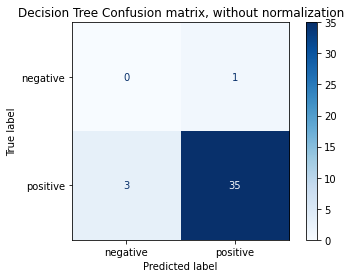

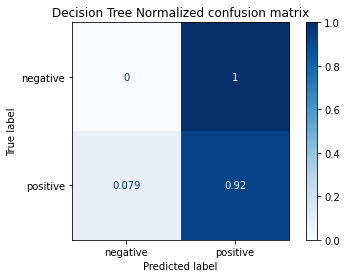

In [19]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Decision Tree Confusion matrix, without normalization", None),
                  ("Decision Tree Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Random Forest:

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
RFA = round(rf.score(X_test, y_test)*100, 2)
RFA

97.44

In [21]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.11553777610741361, 'sc'),
 (0.10599708471069752, 'bgr'),
 (0.09720184487723266, 'bu'),
 (0.07338203635453809, 'su'),
 (0.06903111749710207, 'hemo'),
 (0.06424261285112573, 'age'),
 (0.062126678903582096, 'pot'),
 (0.05917518260897138, 'rc'),
 (0.057466720043003315, 'pcv'),
 (0.04466555025134152, 'bp'),
 (0.03421316759937555, 'htn_no'),
 (0.02903305053133828, 'wc'),
 (0.027384622886483065, 'sod'),
 (0.025996700435305692, 'dm_no'),
 (0.0235838004288024, 'al'),
 (0.02321374036683623, 'sg'),
 (0.018786031374503586, 'pcc_notpresent'),
 (0.015517387674120345, 'pe_no'),
 (0.01203914621954407, 'ba_notpresent'),
 (0.010125351076054452, 'ane_no'),
 (0.008915274799309095, 'appet_good'),
 (0.008651080005764464, 'pc_abnormal'),
 (0.007453918877794409, 'rbc_abnormal'),
 (0.006260123519760448, 'classification_ckd')]

Random Forrest Confusion matrix, without normalization
[[ 0  1]
 [ 0 38]]
Random Forrest Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


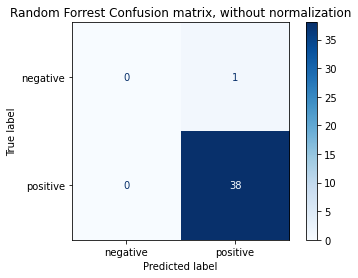

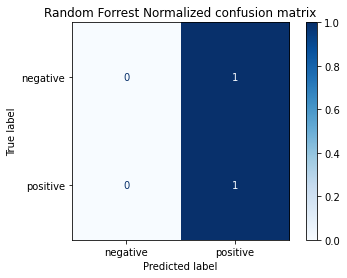

In [22]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Random Forrest Confusion matrix, without normalization", None),
                  ("Random Forrest Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [24]:
classifier.fit(X_train, y_train)

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
LRA = round((classifier.score(X_test, y_test) * 100),2)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
LRA

Training Data Score: 0.9739130434782609
Testing Data Score: 0.9487179487179487


94.87

In [26]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [27]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,0


Logistic Regression Confusion matrix, without normalization
[[ 0  1]
 [ 1 37]]
Logistic Regression Normalized confusion matrix
[[0.   1.  ]
 [0.03 0.97]]


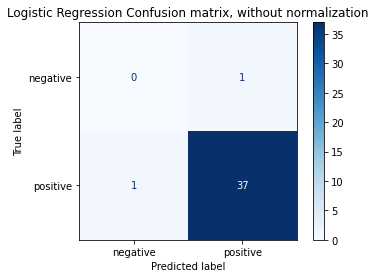

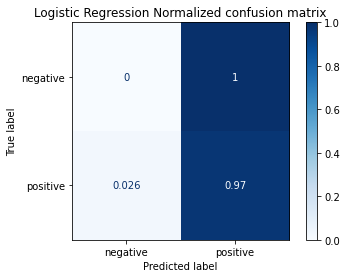

In [28]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# SVC

In [29]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)
svc = model.fit(X_train, y_train)

In [30]:
print('Test Acc: %.3f' % model.score(X_test, y_test))
SVMA = round((svc.score(X_test, y_test) * 100),2)
SVMA

Test Acc: 0.949


94.87

In [31]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.33      1.00      0.50         1
    positive       1.00      0.95      0.97        38

    accuracy                           0.95        39
   macro avg       0.67      0.97      0.74        39
weighted avg       0.98      0.95      0.96        39



Support Vector Machine Confusion matrix, without normalization
[[ 1  0]
 [ 2 36]]
Support Vector Machine Normalized confusion matrix
[[1.   0.  ]
 [0.05 0.95]]


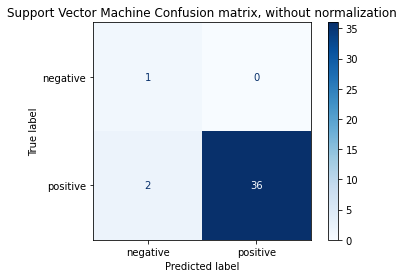

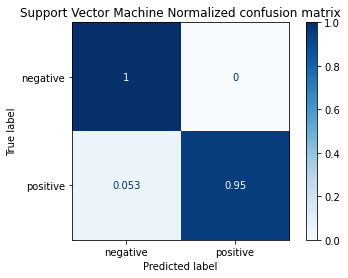

In [32]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Support Vector Machine Confusion matrix, without normalization", None),
                  ("Support Vector Machine Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# One-Hot Encoding

In [33]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

# Scaling the Data:

In [34]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [35]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.974
k: 3, Train/Test Score: 0.939/0.923
k: 5, Train/Test Score: 0.939/0.974
k: 7, Train/Test Score: 0.939/0.923
k: 9, Train/Test Score: 0.939/0.974
k: 11, Train/Test Score: 0.930/0.949
k: 13, Train/Test Score: 0.930/0.949
k: 15, Train/Test Score: 0.913/0.974
k: 17, Train/Test Score: 0.922/0.974
k: 19, Train/Test Score: 0.922/0.974
k: 21, Train/Test Score: 0.922/0.974
k: 23, Train/Test Score: 0.922/0.974
k: 25, Train/Test Score: 0.922/0.974
k: 27, Train/Test Score: 0.922/0.974
k: 29, Train/Test Score: 0.922/0.974


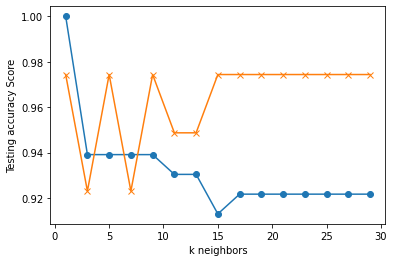

In [37]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
KNNA = round((knn.score(X_test_scaled, y_test) * 100),2)
KNNA

k=17 Test Acc: 0.974


97.44

# Neural Network

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=48, activation='relu', input_dim=24))
model.add(Dense(units=2, activation='softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                1200      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 98        
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 115 samples
Epoch 1/100
115/115 - 1s - loss: 0.5979 - accuracy: 0.8696
Epoch 2/100
115/115 - 0s - loss: 0.4988 - accuracy: 0.9043
Epoch 3/100
115/115 - 0s - loss: 0.4161 - accuracy: 0.9217
Epoch 4/100
115/115 - 0s - loss: 0.3536 - accuracy: 0.9130
Epoch 5/100
115/115 - 0s - loss: 0.2990 - accuracy: 0.8957
Epoch 6/100
115/115 - 0s - loss: 0.2606 - accuracy: 0.8957
Epoch 7/100
115/115 - 0s - loss: 0.2350 - accuracy: 0.8957
Epoch 8/100
115/115 - 0s - loss: 0.2142 - accuracy: 0.9130
Epoch 9/100
115/115 - 0s - loss: 0.1962 - accuracy: 0.9304
Epoch 10/100
115/115 - 0s - loss: 0.1832 - accuracy: 0.9391
Epoch 11/100
115/115 - 0s - loss: 0.1718 - accuracy: 0.9391
Epoch 12/100
115/115 - 0s - loss: 0.1623 - accuracy: 0.9304
Epoch 13/100
115/115 - 0s - loss: 0.1540 - accuracy: 0.9304
Epoch 14/100
115/115 - 0s - loss: 0.1476 - accuracy: 0.9478
Epoch 15/100
115/115 - 0s - loss: 0.1416 - accuracy: 0.9565
Epoch 16/100
115/115 - 0s - loss: 0.1359 - accuracy: 0.9652
Epoch 17/100
115/115 - 0s - 

In [45]:
# Neural Network Acct
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

NNA = round((model_accuracy * 100),2)
NNA

39/39 - 0s - loss: 0.0677 - accuracy: 0.9487
Normal Neural Network - Loss: 0.06774842874326098, Accuracy: 0.9487179517745972


94.87

# Deep Learning

In [46]:
deep_model = Sequential()
deep_model.add(Dense(units=48, activation='relu', input_dim=24))
deep_model.add(Dense(units=24, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [47]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 115 samples
Epoch 1/100
115/115 - 1s - loss: 0.7240 - accuracy: 0.5217
Epoch 2/100
115/115 - 0s - loss: 0.5933 - accuracy: 0.8174
Epoch 3/100
115/115 - 0s - loss: 0.4880 - accuracy: 0.8870
Epoch 4/100
115/115 - 0s - loss: 0.4023 - accuracy: 0.9217
Epoch 5/100
115/115 - 0s - loss: 0.3372 - accuracy: 0.9304
Epoch 6/100
115/115 - 0s - loss: 0.2850 - accuracy: 0.9217
Epoch 7/100
115/115 - 0s - loss: 0.2431 - accuracy: 0.9217
Epoch 8/100
115/115 - 0s - loss: 0.2094 - accuracy: 0.9217
Epoch 9/100
115/115 - 0s - loss: 0.1832 - accuracy: 0.9217
Epoch 10/100
115/115 - 0s - loss: 0.1621 - accuracy: 0.9304
Epoch 11/100
115/115 - 0s - loss: 0.1467 - accuracy: 0.9391
Epoch 12/100
115/115 - 0s - loss: 0.1332 - accuracy: 0.9478
Epoch 13/100
115/115 - 0s - loss: 0.1229 - accuracy: 0.9565
Epoch 14/100
115/115 - 0s - loss: 0.1138 - accuracy: 0.9652
Epoch 15/100
115/115 - 0s - loss: 0.1066 - accuracy: 0.9739
Epoch 16/100
115/115 - 0s - loss: 0.0993 - accuracy: 0.9826
Epoch 17/100
115/115 - 0s - 

In [48]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - loss: 0.0677 - accuracy: 0.9487
Normal Neural Network - Loss: 0.06774842874326098, Accuracy: 0.9487179517745972


In [49]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - loss: 0.0726 - accuracy: 0.9487
Deep Neural Network - Loss: 0.07255336217797147, Accuracy: 0.9487179517745972


Logistic Regression Confusion matrix, without normalization
[[ 0  1]
 [ 1 37]]
Logistic Regression Normalized confusion matrix
[[0.   1.  ]
 [0.03 0.97]]


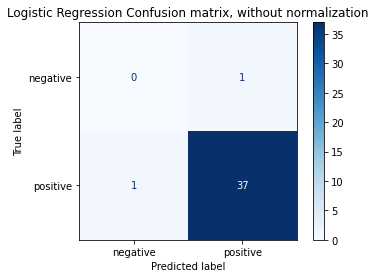

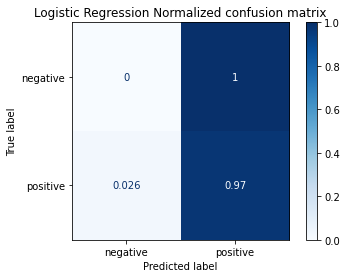

In [50]:
import numpy as np

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [51]:
# Deep Learning Acct
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


DLA = round((model_accuracy * 100),2)
DLA

39/39 - 0s - loss: 0.0726 - accuracy: 0.9487
Deep Neural Network - Loss: 0.07255336217797147, Accuracy: 0.9487179517745972


94.87

# Model Accuracy

In [52]:
# CLF = clf.score(X_test, y_test) * 100

# LRA = classifier.score(X_test, y_test) * 100
# DTA = (clf.score(X_test, y_test) * 100)
# RFA = (rf.score(X_test, y_test) * 100)
# SVMA = (svc.score(X_test, y_test) * 100)
# KNNA = (knn.score(X_test_scaled, y_test) * 100)
# NNA = (model_accuracy * 100).round(2)

In [53]:
# print(f"LRA: {LRA}")
# print(f"DTA: {DTA}")
# print(f"RFA: {RFA}")
# print(f"SVMA: {SVMA}")
# print(f"KNNA: {KNNA}")
# print(f"NNA: {NNA}")

In [54]:
KidneyModelAccuracy_df = pd.DataFrame({"ML_Model":["Decision Tree","Random Forrest","Logistical Regression","Support Vector Machine","K Nearest Neighbors","Neural Network","Deep Learning"],
                            "Kidney_Model_Accuracy":[DTA, RFA, LRA, SVMA, KNNA, NNA, DLA]                       
                             })

KidneyModelAccuracy_df

,ML_Model,Kidney_Model_Accuracy
0,Decision Tree,89.74
1,Random Forrest,97.44
2,Logistical Regression,94.87
3,Support Vector Machine,94.87
4,K Nearest Neighbors,97.44
5,Neural Network,94.87
6,Deep Learning,94.87


In [55]:
Accuracy_df = pd.read_csv(os.path.join("data/Heart_Model_Accuracy.csv"))
Accuracy_df

,ML_Model,Accuracy
0,Decision Tree,78.67
1,Random Forrest,85.33
2,Logistical Regression,86.67
3,Support Vector Machine,89.33
4,K Nearest Neighbors,85.33
5,Neural Network,85.33
6,Deep Learning,81.33


In [56]:
Model_Accuracy_df = pd.merge(Accuracy_df, KidneyModelAccuracy_df, on='ML_Model')
Model_Accuracy_df = Model_Accuracy_df.rename(columns={'Accuracy':'Heart_Model_Accuracy'})
Model_Accuracy_df

,ML_Model,Heart_Model_Accuracy,Kidney_Model_Accuracy
0,Decision Tree,78.67,89.74
1,Random Forrest,85.33,97.44
2,Logistical Regression,86.67,94.87
3,Support Vector Machine,89.33,94.87
4,K Nearest Neighbors,85.33,97.44
5,Neural Network,85.33,94.87
6,Deep Learning,81.33,94.87


<AxesSubplot:>

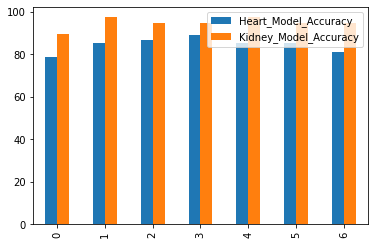

In [57]:
Model_Accuracy_df.plot(kind="bar")

In [58]:
Model_Accuracy_df.to_csv('data/Heart_Kidney_Model_Accuracy.csv',index=False)

# Linear Regression

In [59]:
X = kidney_binary_data
y = target.values.reshape(-1, 1)
print(X.shape, y.shape)
print(X)

(154, 24) (154, 1)
      age    bp     sg   al   su    bgr     bu   sc    sod  pot  ...  \
3    48.0  70.0  1.005  4.0  0.0  117.0   56.0  3.8  111.0  2.5  ...   
9    53.0  90.0  1.020  2.0  0.0   70.0  107.0  7.2  114.0  3.7  ...   
11   63.0  70.0  1.010  3.0  0.0  380.0   60.0  2.7  131.0  4.2  ...   
14   68.0  80.0  1.010  3.0  2.0  157.0   90.0  4.1  130.0  6.4  ...   
20   61.0  80.0  1.015  2.0  0.0  173.0  148.0  3.9  135.0  5.2  ...   
..    ...   ...    ...  ...  ...    ...    ...  ...    ...  ...  ...   
395  55.0  80.0  1.020  0.0  0.0  140.0   49.0  0.5  150.0  4.9  ...   
396  42.0  70.0  1.025  0.0  0.0   75.0   31.0  1.2  141.0  3.5  ...   
397  12.0  80.0  1.020  0.0  0.0  100.0   26.0  0.6  137.0  4.4  ...   
398  17.0  60.0  1.025  0.0  0.0  114.0   50.0  1.0  135.0  4.9  ...   
399  58.0  80.0  1.025  0.0  0.0  131.0   18.0  1.1  141.0  3.5  ...   

     rbc_abnormal pc_abnormal pcc_notpresent ba_notpresent  htn_no  dm_no  \
3               0           1          

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [62]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

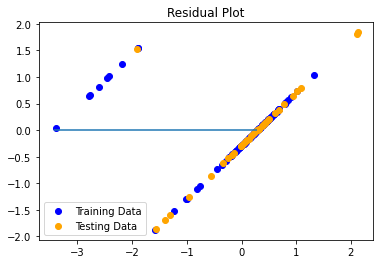

In [64]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

### Linear Regression is not a good model for predicting the outcome because the residuals plot is not random indicating a non-linear relationship of the data.